In [1]:
import pandas as pdu

In [2]:
btc = pd.read_csv("BTC-USD.csv")

In [4]:
btc

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-06-18,26510.457031,26675.925781,26325.890625,26336.212891,26336.212891,9565695129
1,2023-06-19,26335.441406,26984.611328,26312.832031,26851.029297,26851.029297,12826986222
2,2023-06-20,26841.664063,28388.968750,26668.791016,28327.488281,28327.488281,22211859147
3,2023-06-21,28311.310547,30737.330078,28283.410156,30027.296875,30027.296875,33346760979
4,2023-06-22,29995.935547,30495.998047,29679.158203,29912.281250,29912.281250,20653160491
...,...,...,...,...,...,...,...
362,2024-06-14,66747.570313,67294.648438,65056.894531,66011.093750,66011.093750,27403884779
363,2024-06-15,66006.742188,66402.187500,65871.773438,66191.000000,66191.000000,14121265576
364,2024-06-16,66189.359375,66894.843750,66018.250000,66639.046875,66639.046875,13281140541
365,2024-06-17,66636.515625,67188.320313,65094.964844,66490.296875,66490.296875,30006354476


In [25]:
from bokeh.plotting import figure, show, save
from bokeh.io import export_png
from math import pi
from bokeh.io import output_notebook as ON

ON()

btc["Date"] = pd.to_datetime(btc["Date"])

inc = btc.Close > btc.Open
dec = btc.Open > btc.Close
w = 12*60*60*1000 # half day in ms

TOOLS = "pan,wheel_zoom,box_zoom,reset,save"

p = figure(x_axis_type="datetime", tools=TOOLS, width=1000, title = "btc Candlestick")
p.xaxis.major_label_orientation = pi/4
p.grid.grid_line_alpha=0.3

#p.line(btc.Date[:100], btc.Close[:100])

p.segment(btc.Date, btc.High, btc.Date, btc.Low, color="black")
p.vbar(btc.Date[inc], w, btc.Open[inc], btc.Close[inc], fill_color="#D5E1DD", line_color="black")
p.vbar(btc.Date[dec], w, btc.Open[dec], btc.Close[dec], fill_color="#F2583E", line_color="black")

export_png(p, filename = "charterino.png")
#show(p)

Loading BokehJS ...

RuntimeError: To use bokeh.io image export functions you need selenium ('conda install selenium' or 'pip install selenium')

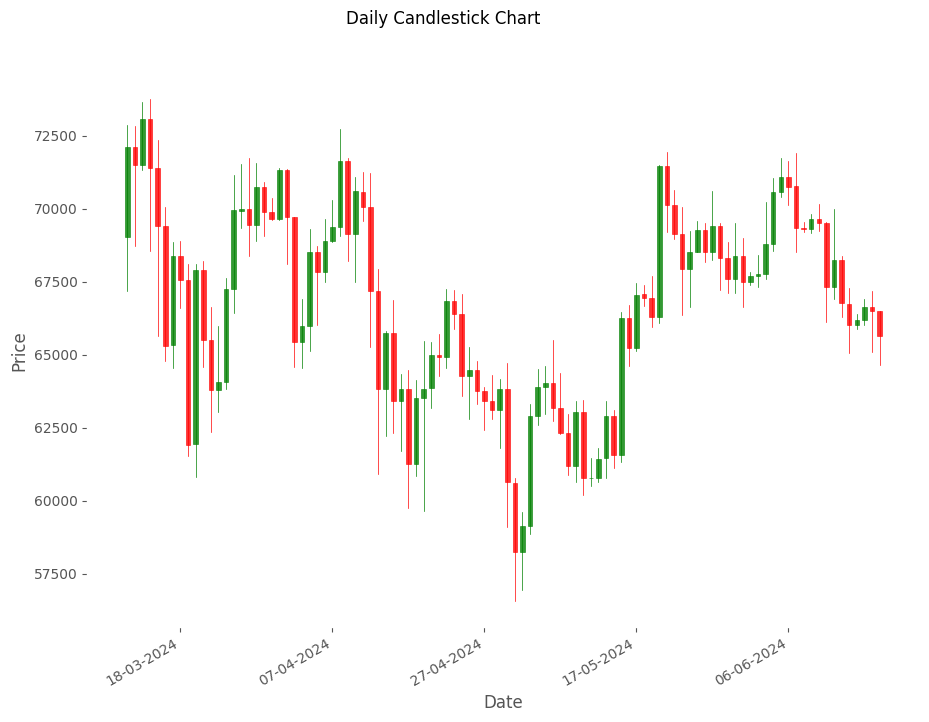

In [87]:
import matplotlib.pyplot as plt
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mpl_dates

plt.style.use('ggplot')

btcbis = btc.iloc[-100:]

# Extracting Data for plotting
ohlc = btcbis.loc[:, ['Date', 'Open', 'High', 'Low', 'Close']]
ohlc['Date'] = pd.to_datetime(ohlc['Date'])
ohlc['Date'] = ohlc['Date'].apply(mpl_dates.date2num)
ohlc = ohlc.astype(float)

# Creating Subplots
fig, ax = plt.subplots()

candlestick_ohlc(ax, ohlc.values, width=0.6, colorup='green', colordown='red', alpha=0.8)

# Setting labels & titles
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_facecolor('white')
fig.suptitle('Daily Candlestick Chart')

# Formatting Date
date_format = mpl_dates.DateFormatter('%d-%m-%Y')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()

fig.tight_layout()
fig.set_size_inches(10,8)

plt.savefig("chartlast100candles.png")

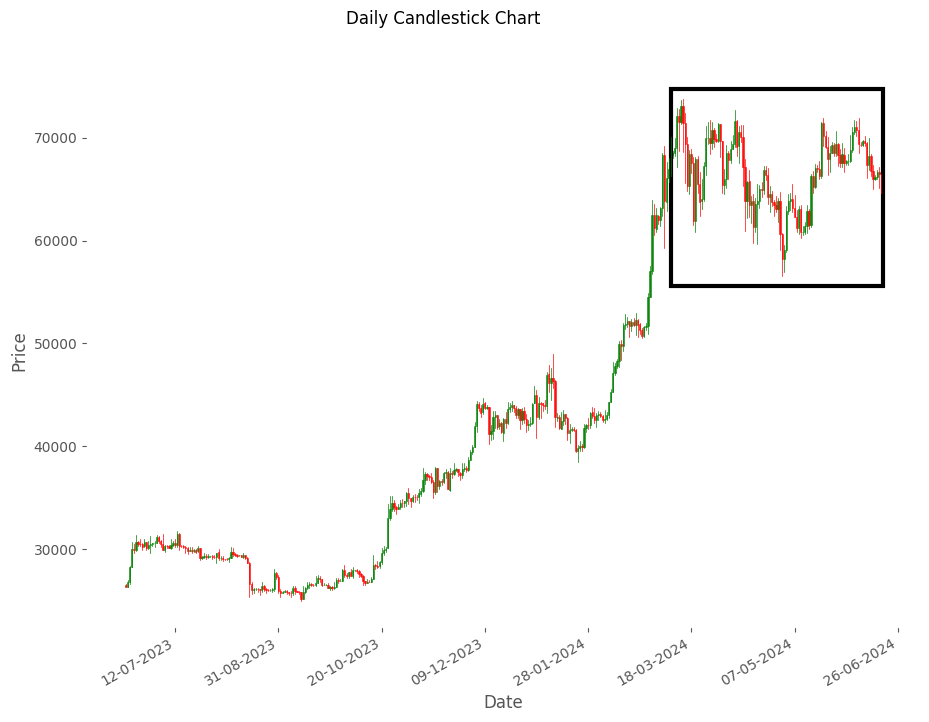

In [88]:
import matplotlib.pyplot as plt
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mpl_dates
from matplotlib.patches import Rectangle
from datetime import timedelta

plt.style.use('ggplot')

btcbis = btc.iloc[-100:]

# Extracting Data for plotting
ohlc = btc.loc[:, ['Date', 'Open', 'High', 'Low', 'Close']]
ohlc['Date'] = pd.to_datetime(ohlc['Date'])
ohlc['Date'] = ohlc['Date'].apply(mpl_dates.date2num)
ohlc = ohlc.astype(float)

# Creating Subplots
fig, ax = plt.subplots()

candlestick_ohlc(ax, ohlc.values, width=0.6, colorup='green', colordown='red', alpha=0.8)

# Setting labels & titles
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_facecolor('white')
fig.suptitle('Daily Candlestick Chart')

# Formatting Date
date_format = mpl_dates.DateFormatter('%d-%m-%Y')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()

fig.tight_layout()
fig.set_size_inches(10,8)

#add rectangle to plot
lowestlow = min(btcbis.Low)
highesthigh = max(btcbis.High)
lowermargin = lowestlow - 1000 #((lowestlow*1)/100)
uppermargindiff = (highesthigh - lowermargin) + 1000 #((highesthigh*1)/100)

ax.add_patch(Rectangle((btcbis.Date.iloc[0] - timedelta(days=3), lowermargin), timedelta(days=103), uppermargindiff,
             edgecolor = 'black',
             facecolor = 'blue',
             fill=False,
             lw=3))

plt.savefig("fullcharthighlight100candles.png")

In [77]:
lowermargin

54555.292969